# Practice code for Data Science Final Exam

## Decision tree model 

In [1]:
import numpy as np
from collections import Counter
from sklearn.datasets import load_breast_cancer

In [ ]:
# Visualize X features and y label (instead of the full Bunch data-structure)

X,y = load_breast_cancer(return_X_y=True)
print(f'num observations:    {X.shape[0]}') # X features
print(f'num features:        {X.shape[1]}') # y labels
print(f'target value counts: {dict(Counter(y))}')

num observations:    569
num features:        30
target value counts: {0: 212, 1: 357}


In [4]:
# Import the train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split X and y into X_train,X_test,y_train,y_test 
#    using train_test_split, 
#    stratify using y, 
#    and use the default test_size of 0.25.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    test_size= 0.25)

# Check that the distribution of classes is similar in train and test
assert ((y_train == 0).sum() / len(y_train) - 
        (y_test == 0).sum() / len(y_test)) < .01

In [8]:
# Get a baseline 

# Import DummyClassifier from sklearn
from sklearn.dummy import DummyClassifier

#   Instantiate DummyClassifier 
#      with strategy="prior" (the default)
#      and fit on X_train, y_train
#      store as dummyc
dummyc = DummyClassifier(strategy = 'prior').fit(X_train, y_train)

# print out the training set accuracy using dummyc.score()
print(f'dummy training set accuracy: {dummyc.score(X_train, y_train):0.2f}')

# print out the test set accuracy using dummyc.score()
print(f'    dummy test set accuracy: {dummyc.score(X_test, y_test):0.2f}')

dummy training set accuracy: 0.63
    dummy test set accuracy: 0.63


In [11]:
# Train and compare a Decision Tree model

# Import DecisionTreeClassifier from sklearn
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 
#    with max_depth=10
#    and train on X_train,y_train
#    store as dtc
dtc = DecisionTreeClassifier(max_depth = 10).fit(X_train, y_train)

# print out the training set accuracy using dtc.score()
print(f'dtc training set accuracy: {dtc.score(X_train, y_train):0.2f}')

# print out the test set accuracy using dtc.score()
print(f'    dtc test set accuracy: {dtc.score(X_test, y_test):0.2f}')

dtc training set accuracy: 1.00
    dtc test set accuracy: 0.89


In [ ]:
# To expose the different kinds of errors that our Decision Tree model is making,
#   print a confusion matrix 

# import confusion_matrix from sklearn.metrics
from sklearn.metrics import confusion_matrix

# generate a confusion_matrix
#    using y_test 
#    and the predictions generated by the trained dtc model on X_test
#    store as cm
cm = confusion_matrix(y_test, dtc.predict(X_test))
print(cm)

[[46  7]
 [ 9 81]]


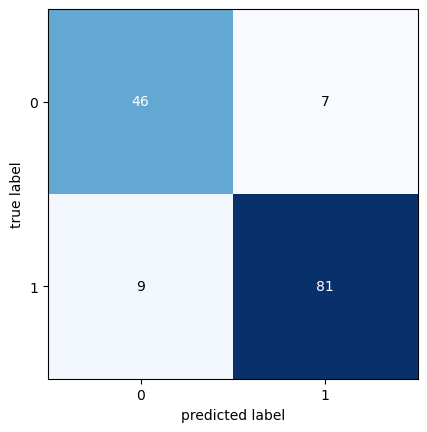

In [ ]:
# To help interpret the output of confusion_matrix, 
#    use plot_confusion_matrix from mlxtend

# Import the plot_confusion_matrix function from mlxtend.plotting
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

# call plot_confusion_matrix() on the output of confusion_matrix generated above (cm)
fig, ax = plot_confusion_matrix(conf_mat = cm)
plt.show()

## Data processing for missing values

In [15]:
# import numpy as np and pandas as pd
import numpy as np
import pandas as pd

In [19]:
# This data includes a datetime column DocumentDate. 
#  Use parse_dates to parse this column into datetimes
#  Print df.info() to see the number of rows, column names, column datatypes and amount of missing data.
df = pd.read_csv('../data/week8_housing_data.csv',
                 parse_dates=['DocumentDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DocumentDate  500 non-null    datetime64[ns]
 1   PropertyType  478 non-null    object        
 2   SqFtLot       489 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 11.8+ KB


In [23]:
# If we run df.duplicated() we get a vector of booleans that indicate duplicated rows.
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

In [ ]:
# Use df.duplicated() with default values and .sum() to assert that there are 3 duplicated rows
assert df.duplicated().sum() == 3
# There are 3 duplicated rows

In [26]:
# Use drop_duplicates() to drop the duplicated rows.
#   Compare the entire row (subset=None) and keep the first duplicate (keep='first') (the defaults)
# Store back into df
df = df.drop_duplicates(subset = None, # keep entire row
                        keep = 'first' # keep 1st duplicate
                        )

# Confirm that the correct number of rows have been dropped
assert df.shape[0] == 497

In [27]:
# Before continuing, note the is a missing SqFtLot in the first row
df.head(3)

,DocumentDate,PropertyType,SqFtLot
0,2006-11-21,Single Family,NaN
1,2007-04-16,Townhouse,937.0
2,2006-01-18,NaN,13167.0


In [28]:
# From the .info() above, we see there are missing values in SqFtLot.
#   Before we fill this column, create a new dummy column 'SqFtLot_missing' in df.
#   This column should contain integers, 1 for missing, 0 for not missing.
# Use .isna() and .astype(int) to create the 'SqFtLot_missing' column.
df['SqFtLot_missing'] = df.SqFtLot.isna().astype(int)

# Assert that the number of 1's in the SqFtLot_missing column equals the number of missing values in SqFtLot
assert df.SqFtLot_missing.sum() == df.SqFtLot.isna().sum()

# Assert that the dtype of SqFtLot_missing is int
assert df.SqFtLot_missing.dtype == int

In [ ]:
# Now fill the missing values in df.SqFtLot with the mean of the SqFtLot column.
#   Use .fillna() and .mean()
# Store back into the existing SqFtLot column.
df['SqFtLot'] = df.SqFtLot.fillna(df.SqFtLot).mean()

# Assert that the SqFtLot column no longer contains any missing values (number of missing values == 0)
assert df.SqFtLot.isna().sum() == 0

In [35]:
# The missing SqFtLot should now be filled
df.head(3)

,DocumentDate,PropertyType,SqFtLot,SqFtLot_missing
0,2006-11-21,Single Family,13801.04321,1
1,2007-04-16,Townhouse,13801.04321,0
2,2006-01-18,NaN,13801.04321,0


In [ ]:
# There are also missing values in PropertyType.
#   Since 'PropertyType' is categorical, let's treat MISSING as another category.
#   Fill the empty values in PropertyType with the string 'MISSING'.
# Store back into the existing PropertyType column.
df['PropertyType'] = df.PropertyType.fillna('MISSING')

# Call .value_counts() on the PropertyType column to see how many of each category exist in the dataframe.
# We should see 22 MISSING values
df.PropertyType.value_counts()

PropertyType
Single Family    455
MISSING           22
Townhouse         12
Multiplex          8
Name: count, dtype: int64

In [ ]:
# Check the missing value for each feature
df.isna().sum()

DocumentDate       0
PropertyType       0
SqFtLot            0
SqFtLot_missing    0
dtype: int64

In [39]:
# Confirm we have no missing data by asserting that the sum of df.isna() over rows and columns is equal to 0.
assert df.isna().sum().sum() == 0

# Print df.info() to visualy confirm there are no missing values as well
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 497 entries, 0 to 499
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   DocumentDate     497 non-null    datetime64[ns]
 1   PropertyType     497 non-null    object        
 2   SqFtLot          497 non-null    float64       
 3   SqFtLot_missing  497 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 19.4+ KB


In [44]:
# Before we one hot enocode PropertyType, print the first 3 rows of df and note their PropertyType values
df.head(3)

,DocumentDate,PropertyType,SqFtLot,SqFtLot_missing
0,2006-11-21,Single Family,13801.04321,1
1,2007-04-16,Townhouse,13801.04321,0
2,2006-01-18,MISSING,13801.04321,0


In [ ]:
# Transform the categorical feature PropertyType using pd.get_dummies().
#   Note that we can call get_dummies on the entire dataframe and only categorical features will be transformed.
# Store the result of get_dummies into df_new
df_new = pd.get_dummies(df, 
                        drop_first= True # This drops the first dummy variable created for each categorical feature, 
                                         # to reduce the # of columns 
                                         # and to avoid collinarity issues
                        )

# Print out the first 3 rows of df_new to see the result.
df_new.head(3)

,DocumentDate,SqFtLot,SqFtLot_missing,PropertyType_Multiplex,PropertyType_Single Family,PropertyType_Townhouse
0,2006-11-21,13801.04321,1,False,True,False
1,2007-04-16,13801.04321,0,False,False,True
2,2006-01-18,13801.04321,0,False,False,False


In [52]:
df_new = pd.get_dummies(df)
df_new.head(3)

,DocumentDate,SqFtLot,SqFtLot_missing,PropertyType_MISSING,PropertyType_Multiplex,PropertyType_Single Family,PropertyType_Townhouse
0,2006-11-21,13801.04321,1,False,False,True,False
1,2007-04-16,13801.04321,0,False,False,False,True
2,2006-01-18,13801.04321,0,True,False,False,False
